<a href="https://colab.research.google.com/github/diegompin/mtsa/blob/feature%2Fv0.0.8/examples/MTSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MTSA - **M**ultiple **T**ime **S**eries **A**nalysis


### Installing MTSA module:

In [1]:
%load_ext autoreload
%autoreload 2

### Cloning MTSA repository:

*Obs: This step is necessary to access the example data.*

In [ ]:
#!git clone https://github.com/jgersonneto/mtsa.git

### Setting data directory:

In [2]:
import os
path_input_1 = os.path.join(os.getcwd(),  "sample_data", "machine_type_1", "id_00")
path_input_2 = os.path.join(os.getcwd(),  "mtsa", "examples", "sample_data", "machine_type_1", "id_00")

path_input_fan_id_00 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_00")
path_input_fan_id_02 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_02")
path_input_fan_id_04 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_04")
path_input_fan_id_06 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_06")

path_input_pump_id_00 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "pump", "id_00")
path_input_pump_id_02 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "pump", "id_02")
path_input_pump_id_04 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "pump", "id_04")
path_input_pump_id_06 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "pump", "id_06")

path_input_slider_id_00 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "slider", "id_00")
path_input_slider_id_02 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "slider", "id_02")
path_input_slider_id_04 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "slider", "id_04")
path_input_slider_id_06 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "slider", "id_06")

path_input_valve_id_00 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "valve", "id_00")
path_input_valve_id_02 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "valve", "id_02")
path_input_valve_id_04 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "valve", "id_04")
path_input_valve_id_06 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "valve", "id_06")

In [4]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

2024-04-22 07:51:56.355750: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 07:51:57.637678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-22 07:51:57.637904: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-

In [3]:
import sys
sys.path.append("..")

### Reading Data Files:

In [4]:
from mtsa import calculate_aucroc

2024-04-29 02:09:59.373635: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [83]:

from mtsa import files_train_test_split
X_train, X_test, y_train, y_test = files_train_test_split(path_input_fan_id_06)
#if(len(y_train) == 0): 
#    X_train, X_test, y_train, y_test = files_train_test_split(path_input_2)
y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### MFFCMix Model:

In [ ]:
#from mtsa import MFCCMix
#model_mfccmix = MFCCMix()
#model_mfccmix.fit(X_train, y_train)
#model_mfccmix.model

In [ ]:
#auc = calculate_aucroc(model_mfccmix, X_test, y_test)
#auc

### Hitachi Model: Fan

In [ ]:
#from mtsa import Hitachi
#model_hitachi = Hitachi()
#model_hitachi.fit(X_train, y_train)
#model_hitachi.model

In [ ]:
#auc = calculate_aucroc(model_hitachi, X_test, y_test)
#auc

### IForest Model: Fan

In [8]:
from mtsa import IForest

model_isolationforest1 = IForest(n_estimators=100, contamination=0.1, n_jobs=10)
model_isolationforest1.fit(X_train, y_train)
model_isolationforest1.model

model_isolationforest2 = IForest(n_estimators=200, contamination=0.1, n_jobs=10)
model_isolationforest2.fit(X_train, y_train)
model_isolationforest2.model

model_isolationforest3 = IForest(n_estimators=1000, contamination=0.1, n_jobs=10)
model_isolationforest3.fit(X_train, y_train)
model_isolationforest3.model

model_isolationforest4 = IForest(n_estimators=100, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest4.fit(X_train, y_train)
model_isolationforest4.model

model_isolationforest5 = IForest(n_estimators=200, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest5.fit(X_train, y_train)
model_isolationforest5.model

model_isolationforest6 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest6.fit(X_train, y_train)
model_isolationforest6.model

model_isolationforest7 = IForest(n_estimators=100, contamination=0.1, max_features=0.3, n_jobs=10)
model_isolationforest7.fit(X_train, y_train)
model_isolationforest7.model

model_isolationforest8 = IForest(n_estimators=100, contamination=0.1, max_features=0.5, n_jobs=10)
model_isolationforest8.fit(X_train, y_train)
model_isolationforest8.model

model_isolationforest9 = IForest(n_estimators=100, contamination=0.1, max_features=0.8, n_jobs=10)
model_isolationforest9.fit(X_train, y_train)
model_isolationforest9.model

model_isolationforest10 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.3, n_jobs=10)
model_isolationforest10.fit(X_train, y_train)
model_isolationforest10.model

model_isolationforest11 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.5, n_jobs=10)
model_isolationforest11.fit(X_train, y_train)
model_isolationforest11.model

model_isolationforest12 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.8, n_jobs=10)
model_isolationforest12.fit(X_train, y_train)
model_isolationforest12.model

model_isolationforest13 = IForest(n_estimators=1000, contamination=0.1, max_features=0.3, n_jobs=10)
model_isolationforest13.fit(X_train, y_train)
model_isolationforest13.model

model_isolationforest14 = IForest(n_estimators=1000, contamination=0.1, max_features=0.5, n_jobs=10)
model_isolationforest14.fit(X_train, y_train)
model_isolationforest14.model

model_isolationforest15 = IForest(n_estimators=1000, contamination=0.1, max_features=0.8, n_jobs=10)
model_isolationforest15.fit(X_train, y_train)
model_isolationforest15.model

model_isolationforest16 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.3, n_jobs=10)
model_isolationforest16.fit(X_train, y_train)
model_isolationforest16.model

model_isolationforest17 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.5, n_jobs=10)
model_isolationforest17.fit(X_train, y_train)
model_isolationforest17.model

model_isolationforest18 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.8, n_jobs=10)
model_isolationforest18.fit(X_train, y_train)
model_isolationforest18.model

Pipeline(steps=[('wav2array', Wav2Array()),
                ('final_model',
                 IsolationForest(contamination=0.1, max_features=0.8,
                                 max_samples=128, n_estimators=1000,
                                 n_jobs=10))])

In [10]:
import seaborn as sns

In [9]:
auc = calculate_aucroc(model_isolationforest1, X_test, y_test)
print(f'model_isolationforest1(Parameters => n_estimators=100, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest2, X_test, y_test)
print(f'model_isolationforest2(Parameters => n_estimators=200, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest3, X_test, y_test)
print(f'model_isolationforest3(Parameters => n_estimators=1000, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest4, X_test, y_test)
print(f'model_isolationforest4(Parameters => n_estimators=100, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest5, X_test, y_test)
print(f'model_isolationforest5(Parameters => n_estimators=200, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest6, X_test, y_test)
print(f'model_isolationforest6(Parameters => n_estimators=1000, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest7, X_test, y_test)
print(f'model_isolationforest7(Parameters => n_estimators=100, contamination=0.1, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest8, X_test, y_test)
print(f'model_isolationforest8(Parameters => n_estimators=100, contamination=0.1, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest9, X_test, y_test)
print(f'model_isolationforest9(Parameters => n_estimators=100, contamination=0.1, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest10, X_test, y_test)
print(f'model_isolationforest10(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest11, X_test, y_test)
print(f'model_isolationforest11(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest12, X_test, y_test)
print(f'model_isolationforest12(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest13, X_test, y_test)
print(f'model_isolationforest13(Parameters => n_estimators=1000, contamination=0.1, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest14, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest15, X_test, y_test)
print(f'model_isolationforest13(Parameters => n_estimators=1000, contamination=0.1, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest16, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest17, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest18, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.8): {auc}')

model_isolationforest1(Parameters => n_estimators=100, contamination=0.1): 0.29417361745229087
model_isolationforest2(Parameters => n_estimators=200, contamination=0.1): 0.2936288088642659
model_isolationforest3(Parameters => n_estimators=1000, contamination=0.1): 0.2936288088642659
model_isolationforest4(Parameters => n_estimators=100, contamination=0.1, max_samples=128): 0.2932297941237406
model_isolationforest5(Parameters => n_estimators=200, contamination=0.1, max_samples=128): 0.29359811542268704
model_isolationforest6(Parameters => n_estimators=1000, contamination=0.1, max_samples=128): 0.2936288088642659
model_isolationforest7(Parameters => n_estimators=100, contamination=0.1, max_features=0.3): 0.29399713016321233
model_isolationforest8(Parameters => n_estimators=100, contamination=0.1, max_features=0.5): 0.2936748490266342
model_isolationforest9(Parameters => n_estimators=100, contamination=0.1, max_features=0.8): 0.2935367285395293
model_isolationforest10(Parameters => n_esti

In [ ]:
'''
from sklearn.metrics import ( 
    precision_score,
    recall_score,
    f1_score    
)
from sklearn.metrics import classification_report


#Preveja anomalias (positivo)
y_pred = model_isolationforest.predict(X_train)

#Cacule a precisão
precision = precision_score(y_train, y_pred)
#Cacule o recall
recall = recall_score(y_train, y_pred)
#Cacule o F1-Score
f1 = f1_score(y_train, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
'''

In [ ]:
'''
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

iforest = model_isolationforest.model.named_steps['final_model']
tree = iforest.estimators_[100]
#tree = model_isolationforest.model.get_params()
#tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True)
plt.show()
'''

In [ ]:
X_train, X_test, y_train, y_test = files_train_test_split(path_input_pump_id_06)
y_train

### Hitachi Model: Pump

In [ ]:
#model_hitachi = Hitachi()
#model_hitachi.fit(X_train, y_train)
#model_hitachi.model

In [ ]:
#auc = calculate_aucroc(model_hitachi, X_test, y_test)
#auc

### IForest Model: Pump

In [ ]:
model_isolationforest1 = IForest(n_estimators=100, contamination=0.1, n_jobs=10)
model_isolationforest1.fit(X_train, y_train)
model_isolationforest1.model

model_isolationforest2 = IForest(n_estimators=200, contamination=0.1, n_jobs=10)
model_isolationforest2.fit(X_train, y_train)
model_isolationforest2.model

model_isolationforest3 = IForest(n_estimators=1000, contamination=0.1, n_jobs=10)
model_isolationforest3.fit(X_train, y_train)
model_isolationforest3.model

model_isolationforest4 = IForest(n_estimators=100, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest4.fit(X_train, y_train)
model_isolationforest4.model

model_isolationforest5 = IForest(n_estimators=200, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest5.fit(X_train, y_train)
model_isolationforest5.model

model_isolationforest6 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest6.fit(X_train, y_train)
model_isolationforest6.model

model_isolationforest7 = IForest(n_estimators=100, contamination=0.1, max_features=0.3, n_jobs=10)
model_isolationforest7.fit(X_train, y_train)
model_isolationforest7.model

model_isolationforest8 = IForest(n_estimators=100, contamination=0.1, max_features=0.5, n_jobs=10)
model_isolationforest8.fit(X_train, y_train)
model_isolationforest8.model

model_isolationforest9 = IForest(n_estimators=100, contamination=0.1, max_features=0.8, n_jobs=10)
model_isolationforest9.fit(X_train, y_train)
model_isolationforest9.model

model_isolationforest10 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.3, n_jobs=10)
model_isolationforest10.fit(X_train, y_train)
model_isolationforest10.model

model_isolationforest11 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.5, n_jobs=10)
model_isolationforest11.fit(X_train, y_train)
model_isolationforest11.model

model_isolationforest12 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.8, n_jobs=10)
model_isolationforest12.fit(X_train, y_train)
model_isolationforest12.model

model_isolationforest13 = IForest(n_estimators=1000, contamination=0.1, max_features=0.3, n_jobs=10)
model_isolationforest13.fit(X_train, y_train)
model_isolationforest13.model

model_isolationforest14 = IForest(n_estimators=1000, contamination=0.1, max_features=0.5, n_jobs=10)
model_isolationforest14.fit(X_train, y_train)
model_isolationforest14.model

model_isolationforest15 = IForest(n_estimators=1000, contamination=0.1, max_features=0.8, n_jobs=10)
model_isolationforest15.fit(X_train, y_train)
model_isolationforest15.model

model_isolationforest16 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.3, n_jobs=10)
model_isolationforest16.fit(X_train, y_train)
model_isolationforest16.model

model_isolationforest17 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.5, n_jobs=10)
model_isolationforest17.fit(X_train, y_train)
model_isolationforest17.model

model_isolationforest18 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.8, n_jobs=10)
model_isolationforest18.fit(X_train, y_train)
model_isolationforest18.model

In [ ]:
auc = calculate_aucroc(model_isolationforest1, X_test, y_test)
print(f'model_isolationforest1(Parameters => n_estimators=100, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest2, X_test, y_test)
print(f'model_isolationforest2(Parameters => n_estimators=200, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest3, X_test, y_test)
print(f'model_isolationforest3(Parameters => n_estimators=1000, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest4, X_test, y_test)
print(f'model_isolationforest4(Parameters => n_estimators=100, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest5, X_test, y_test)
print(f'model_isolationforest5(Parameters => n_estimators=200, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest6, X_test, y_test)
print(f'model_isolationforest6(Parameters => n_estimators=1000, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest7, X_test, y_test)
print(f'model_isolationforest7(Parameters => n_estimators=100, contamination=0.1, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest8, X_test, y_test)
print(f'model_isolationforest8(Parameters => n_estimators=100, contamination=0.1, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest9, X_test, y_test)
print(f'model_isolationforest9(Parameters => n_estimators=100, contamination=0.1, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest10, X_test, y_test)
print(f'model_isolationforest10(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest11, X_test, y_test)
print(f'model_isolationforest11(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest12, X_test, y_test)
print(f'model_isolationforest12(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest13, X_test, y_test)
print(f'model_isolationforest13(Parameters => n_estimators=1000, contamination=0.1, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest14, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest15, X_test, y_test)
print(f'model_isolationforest13(Parameters => n_estimators=1000, contamination=0.1, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest16, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest17, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest18, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.8): {auc}')

In [10]:
X_train, X_test, y_train, y_test = files_train_test_split(path_input_slider_id_06)
y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Hitachi Model: Slider

In [ ]:
#model_hitachi = Hitachi()
#model_hitachi.fit(X_train, y_train)
#model_hitachi.model

In [ ]:
#auc = calculate_aucroc(model_hitachi, X_test, y_test)
#auc

### IForest Model: Slider

In [11]:
model_isolationforest1 = IForest(n_estimators=100, contamination=0.1, n_jobs=10)
model_isolationforest1.fit(X_train, y_train)
model_isolationforest1.model

model_isolationforest2 = IForest(n_estimators=200, contamination=0.1, n_jobs=10)
model_isolationforest2.fit(X_train, y_train)
model_isolationforest2.model

model_isolationforest3 = IForest(n_estimators=1000, contamination=0.1, n_jobs=10)
model_isolationforest3.fit(X_train, y_train)
model_isolationforest3.model

model_isolationforest4 = IForest(n_estimators=100, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest4.fit(X_train, y_train)
model_isolationforest4.model

model_isolationforest5 = IForest(n_estimators=200, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest5.fit(X_train, y_train)
model_isolationforest5.model

model_isolationforest6 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest6.fit(X_train, y_train)
model_isolationforest6.model

model_isolationforest7 = IForest(n_estimators=100, contamination=0.1, max_features=0.3, n_jobs=10)
model_isolationforest7.fit(X_train, y_train)
model_isolationforest7.model

model_isolationforest8 = IForest(n_estimators=100, contamination=0.1, max_features=0.5, n_jobs=10)
model_isolationforest8.fit(X_train, y_train)
model_isolationforest8.model

model_isolationforest9 = IForest(n_estimators=100, contamination=0.1, max_features=0.8, n_jobs=10)
model_isolationforest9.fit(X_train, y_train)
model_isolationforest9.model

model_isolationforest10 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.3, n_jobs=10)
model_isolationforest10.fit(X_train, y_train)
model_isolationforest10.model

model_isolationforest11 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.5, n_jobs=10)
model_isolationforest11.fit(X_train, y_train)
model_isolationforest11.model

model_isolationforest12 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.8, n_jobs=10)
model_isolationforest12.fit(X_train, y_train)
model_isolationforest12.model

model_isolationforest13 = IForest(n_estimators=1000, contamination=0.1, max_features=0.3, n_jobs=10)
model_isolationforest13.fit(X_train, y_train)
model_isolationforest13.model

model_isolationforest14 = IForest(n_estimators=1000, contamination=0.1, max_features=0.5, n_jobs=10)
model_isolationforest14.fit(X_train, y_train)
model_isolationforest14.model

model_isolationforest15 = IForest(n_estimators=1000, contamination=0.1, max_features=0.8, n_jobs=10)
model_isolationforest15.fit(X_train, y_train)
model_isolationforest15.model

model_isolationforest16 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.3, n_jobs=10)
model_isolationforest16.fit(X_train, y_train)
model_isolationforest16.model

model_isolationforest17 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.5, n_jobs=10)
model_isolationforest17.fit(X_train, y_train)
model_isolationforest17.model

model_isolationforest18 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.8, n_jobs=10)
model_isolationforest18.fit(X_train, y_train)
model_isolationforest18.model

Pipeline(steps=[('wav2array', Wav2Array()),
                ('final_model',
                 IsolationForest(contamination=0.1, max_features=0.8,
                                 max_samples=128, n_estimators=1000,
                                 n_jobs=10))])

In [12]:
auc = calculate_aucroc(model_isolationforest1, X_test, y_test)
print(f'model_isolationforest1(Parameters => n_estimators=100, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest2, X_test, y_test)
print(f'model_isolationforest2(Parameters => n_estimators=200, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest3, X_test, y_test)
print(f'model_isolationforest3(Parameters => n_estimators=1000, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest4, X_test, y_test)
print(f'model_isolationforest4(Parameters => n_estimators=100, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest5, X_test, y_test)
print(f'model_isolationforest5(Parameters => n_estimators=200, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest6, X_test, y_test)
print(f'model_isolationforest6(Parameters => n_estimators=1000, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest7, X_test, y_test)
print(f'model_isolationforest7(Parameters => n_estimators=100, contamination=0.1, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest8, X_test, y_test)
print(f'model_isolationforest8(Parameters => n_estimators=100, contamination=0.1, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest9, X_test, y_test)
print(f'model_isolationforest9(Parameters => n_estimators=100, contamination=0.1, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest10, X_test, y_test)
print(f'model_isolationforest10(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest11, X_test, y_test)
print(f'model_isolationforest11(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest12, X_test, y_test)
print(f'model_isolationforest12(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest13, X_test, y_test)
print(f'model_isolationforest13(Parameters => n_estimators=1000, contamination=0.1, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest14, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest15, X_test, y_test)
print(f'model_isolationforest13(Parameters => n_estimators=1000, contamination=0.1, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest16, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest17, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest18, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.8): {auc}')

model_isolationforest1(Parameters => n_estimators=100, contamination=0.1): 0.6304759500063124
model_isolationforest2(Parameters => n_estimators=200, contamination=0.1): 0.7197323570256281
model_isolationforest3(Parameters => n_estimators=1000, contamination=0.1): 0.7446029541724529
model_isolationforest4(Parameters => n_estimators=100, contamination=0.1, max_samples=128): 0.7119050624921095
model_isolationforest5(Parameters => n_estimators=200, contamination=0.1, max_samples=128): 0.698649160459538
model_isolationforest6(Parameters => n_estimators=1000, contamination=0.1, max_samples=128): 0.7401843201615957
model_isolationforest7(Parameters => n_estimators=100, contamination=0.1, max_features=0.3): 0.7141775028405504
model_isolationforest8(Parameters => n_estimators=100, contamination=0.1, max_features=0.5): 0.7048352480747381
model_isolationforest9(Parameters => n_estimators=100, contamination=0.1, max_features=0.8): 0.7093801287716197
model_isolationforest10(Parameters => n_estimato

In [ ]:
X_train, X_test, y_train, y_test = files_train_test_split(path_input_valve_id_06)
y_train

### Hitachi Model: Valve

In [ ]:
#model_hitachi = Hitachi()
#model_hitachi.fit(X_train, y_train)
#model_hitachi.model

In [ ]:
#auc = calculate_aucroc(model_hitachi, X_test, y_test)
#auc

### IForest Model: Valve

In [ ]:
model_isolationforest1 = IForest(n_estimators=100, contamination=0.1, n_jobs=10)
model_isolationforest1.fit(X_train, y_train)
model_isolationforest1.model

model_isolationforest2 = IForest(n_estimators=200, contamination=0.1, n_jobs=10)
model_isolationforest2.fit(X_train, y_train)
model_isolationforest2.model

model_isolationforest3 = IForest(n_estimators=1000, contamination=0.1, n_jobs=10)
model_isolationforest3.fit(X_train, y_train)
model_isolationforest3.model

model_isolationforest4 = IForest(n_estimators=100, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest4.fit(X_train, y_train)
model_isolationforest4.model

model_isolationforest5 = IForest(n_estimators=200, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest5.fit(X_train, y_train)
model_isolationforest5.model

model_isolationforest6 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, n_jobs=10)
model_isolationforest6.fit(X_train, y_train)
model_isolationforest6.model

model_isolationforest7 = IForest(n_estimators=100, contamination=0.1, max_features=0.3, n_jobs=10)
model_isolationforest7.fit(X_train, y_train)
model_isolationforest7.model

model_isolationforest8 = IForest(n_estimators=100, contamination=0.1, max_features=0.5, n_jobs=10)
model_isolationforest8.fit(X_train, y_train)
model_isolationforest8.model

model_isolationforest9 = IForest(n_estimators=100, contamination=0.1, max_features=0.8, n_jobs=10)
model_isolationforest9.fit(X_train, y_train)
model_isolationforest9.model

model_isolationforest10 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.3, n_jobs=10)
model_isolationforest10.fit(X_train, y_train)
model_isolationforest10.model

model_isolationforest11 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.5, n_jobs=10)
model_isolationforest11.fit(X_train, y_train)
model_isolationforest11.model

model_isolationforest12 = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.8, n_jobs=10)
model_isolationforest12.fit(X_train, y_train)
model_isolationforest12.model

model_isolationforest13 = IForest(n_estimators=1000, contamination=0.1, max_features=0.3, n_jobs=10)
model_isolationforest13.fit(X_train, y_train)
model_isolationforest13.model

model_isolationforest14 = IForest(n_estimators=1000, contamination=0.1, max_features=0.5, n_jobs=10)
model_isolationforest14.fit(X_train, y_train)
model_isolationforest14.model

model_isolationforest15 = IForest(n_estimators=1000, contamination=0.1, max_features=0.8, n_jobs=10)
model_isolationforest15.fit(X_train, y_train)
model_isolationforest15.model

model_isolationforest16 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.3, n_jobs=10)
model_isolationforest16.fit(X_train, y_train)
model_isolationforest16.model

model_isolationforest17 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.5, n_jobs=10)
model_isolationforest17.fit(X_train, y_train)
model_isolationforest17.model

model_isolationforest18 = IForest(n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.8, n_jobs=10)
model_isolationforest18.fit(X_train, y_train)
model_isolationforest18.model

In [ ]:
auc = calculate_aucroc(model_isolationforest1, X_test, y_test)
print(f'model_isolationforest1(Parameters => n_estimators=100, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest2, X_test, y_test)
print(f'model_isolationforest2(Parameters => n_estimators=200, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest3, X_test, y_test)
print(f'model_isolationforest3(Parameters => n_estimators=1000, contamination=0.1): {auc}')
auc = calculate_aucroc(model_isolationforest4, X_test, y_test)
print(f'model_isolationforest4(Parameters => n_estimators=100, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest5, X_test, y_test)
print(f'model_isolationforest5(Parameters => n_estimators=200, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest6, X_test, y_test)
print(f'model_isolationforest6(Parameters => n_estimators=1000, contamination=0.1, max_samples=128): {auc}')
auc = calculate_aucroc(model_isolationforest7, X_test, y_test)
print(f'model_isolationforest7(Parameters => n_estimators=100, contamination=0.1, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest8, X_test, y_test)
print(f'model_isolationforest8(Parameters => n_estimators=100, contamination=0.1, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest9, X_test, y_test)
print(f'model_isolationforest9(Parameters => n_estimators=100, contamination=0.1, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest10, X_test, y_test)
print(f'model_isolationforest10(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest11, X_test, y_test)
print(f'model_isolationforest11(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest12, X_test, y_test)
print(f'model_isolationforest12(Parameters => n_estimators=100, contamination=0.1, max_samples=128, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest13, X_test, y_test)
print(f'model_isolationforest13(Parameters => n_estimators=1000, contamination=0.1, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest14, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest15, X_test, y_test)
print(f'model_isolationforest13(Parameters => n_estimators=1000, contamination=0.1, max_features=0.8): {auc}')
auc = calculate_aucroc(model_isolationforest16, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.3): {auc}')
auc = calculate_aucroc(model_isolationforest17, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.5): {auc}')
auc = calculate_aucroc(model_isolationforest18, X_test, y_test)
print(f'model_isolationforest14(Parameters => n_estimators=1000, contamination=0.1, max_samples=128, max_features=0.8): {auc}')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import librosa
import seaborn as sns

In [35]:
from mtsa.utils import Wav2Array
Xt = Wav2Array(X_train)
Xt

Wav2Array(sampling_rate=array(['/data/jose_gerson/mtsa/examples/../../../MIMII/fan/id_06/normal/00000951.wav',
       '/data/jose_gerson/mtsa/examples/../../../MIMII/fan/id_06/normal/00000801.wav',
       '/data/jose_gerson/mtsa/examples/../../../MIMII/fan/id_06/normal/00000339.wav',
       '/data/jose_gerson/mtsa/examples/../../../MIMII/fan/id_06/normal/00000451.wav',
       '/d...
       '/data/jose_gerson/mtsa/examples/../../../MIMII/fan/id_06/normal/00000787.wav',
       '/data/jose_gerson/mtsa/examples/../../../MIMII/fan/id_06/normal/00000897.wav',
       '/data/jose_gerson/mtsa/examples/../../../MIMII/fan/id_06/normal/00000151.wav',
       '/data/jose_gerson/mtsa/examples/../../../MIMII/fan/id_06/normal/00000864.wav',
       '/data/jose_gerson/mtsa/examples/../../../MIMII/fan/id_06/normal/00001010.wav'],
      dtype='<U78'))

In [46]:
path_input_fan_id_06_normal = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_06","normal")
path_input_fan_id_06_abnormal = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_06","abnormal")

In [47]:
def load_audio_files(path, label):
    audio_files = []
    labels = []
    sample_rate = 0
    for filename in os.listdir(path):
        print(filename)
        if filename.endswith('.wav'):
            file_path = os.path.join(path, filename)
            audio, sample_rate = librosa.load(file_path, sr=None)
            audio_files.append(audio)
            labels.append(label)
    return audio_files, labels, sample_rate

# Load the datasets
abnormal_audio, abnormal_labels, _ = load_audio_files(path_input_fan_id_06_abnormal, label=1)
normal_audio, normal_labels, sample_rate = load_audio_files(path_input_fan_id_06_normal, label=0)

00000023.wav
00000324.wav
00000065.wav
00000181.wav
00000287.wav
00000341.wav
00000305.wav
00000251.wav
00000179.wav
00000275.wav
00000333.wav
00000330.wav
00000091.wav
00000174.wav
00000171.wav
00000064.wav
00000270.wav
00000009.wav
00000005.wav
00000053.wav
00000028.wav
00000177.wav
00000061.wav
00000007.wav
00000204.wav
00000176.wav
00000067.wav
00000203.wav
00000253.wav
00000046.wav
00000103.wav
00000325.wav
00000047.wav
00000339.wav
00000000.wav
00000062.wav
00000164.wav
00000246.wav
00000210.wav
00000268.wav
00000285.wav
00000186.wav
00000276.wav
00000357.wav
00000321.wav
00000160.wav
00000306.wav
00000068.wav
00000219.wav
00000261.wav
00000026.wav
00000114.wav
00000050.wav
00000298.wav
00000189.wav
00000158.wav
00000021.wav
00000277.wav
00000228.wav
00000236.wav
00000155.wav
00000296.wav
00000108.wav
00000242.wav
00000310.wav
00000351.wav
00000198.wav
00000340.wav
00000036.wav
00000081.wav
00000121.wav
00000139.wav
00000224.wav
00000294.wav
00000265.wav
00000038.wav
00000049.wav

In [85]:


def extract_spectral_features(audio, sample_rate):
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)[0]
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)[0]
    return np.mean(spectral_centroids), np.mean(spectral_rolloff), np.mean(spectral_contrast)

def extract_temporal_features(audio):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)[0]
    autocorrelation = librosa.autocorrelate(audio)
    return np.mean(zero_crossing_rate), np.mean(autocorrelation)

In [86]:
abnormal_audio, abnormal_labels, _ = load_audio_files(path_input_fan_id_06, label=1)
normal_audio, normal_labels, sample_rate = load_audio_files(path_input_fan_id_06, label=0)

abnormal
normal
abnormal
normal


In [87]:
def extract_features(audio_data, sample_rate):
    features = []
    for audio in audio_data:
        spectral_features = extract_spectral_features(audio, sample_rate)
        temporal_features = extract_temporal_features(audio)
        all_features = np.concatenate([spectral_features, temporal_features])
        features.append(all_features)
    return np.array(features)

# Extract features for both normal and abnormal data
normal_features = extract_features(normal_audio, sample_rate)
abnormal_features = extract_features(abnormal_audio, sample_rate)

In [88]:
features = []
labels = []

# Extract features for normal audio files
for filename in os.listdir(path_input_fan_id_06_normal):
    audio_path = os.path.join(path_input_fan_id_06_normal, filename)
    audio, sample_rate = librosa.load(audio_path)
    spectral_features = extract_spectral_features(audio, sample_rate)
    temporal_features = extract_temporal_features(audio)
    all_features = np.concatenate([spectral_features, temporal_features])
    features.append(all_features)
    labels.append(1)  # 1 for normal

# Extract features for anomalous audio files
for filename in os.listdir(path_input_fan_id_06_abnormal):
    audio_path = os.path.join(path_input_fan_id_06_abnormal, filename)
    audio, sample_rate = librosa.load(audio_path)
    spectral_features = extract_spectral_features(audio, sample_rate)
    temporal_features = extract_temporal_features(audio)
    all_features = np.concatenate([spectral_features, temporal_features])
    features.append(all_features)
    labels.append(0)  # 0 for anomalous

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Create a DataFrame to store features and labels
df = pd.DataFrame(features)
df['label'] = labels

In [56]:
df

,0,1,2,3,4,label
0,1207.751185,2488.333987,12.390246,0.057064,0.000025,1
1,1412.816577,3013.998944,19.503180,0.060076,0.000028,1
2,1391.901624,2773.786321,18.388453,0.066225,0.000024,1
3,1416.749863,3132.956152,15.650300,0.060716,0.000024,1
4,1177.356351,2393.857682,15.385661,0.053229,0.000031,1
...,...,...,...,...,...,...
1371,1723.502537,3613.106613,14.996420,0.100457,0.000011,0
1372,1269.395796,2638.391935,15.688621,0.051787,0.000059,0
1373,1744.949465,3286.436431,18.004577,0.119170,0.000010,0
1374,1265.186239,2573.642442,14.608402,0.057010,0.000059,0


Index([0, 1, 2, 3, 4, 'label'], dtype='object')


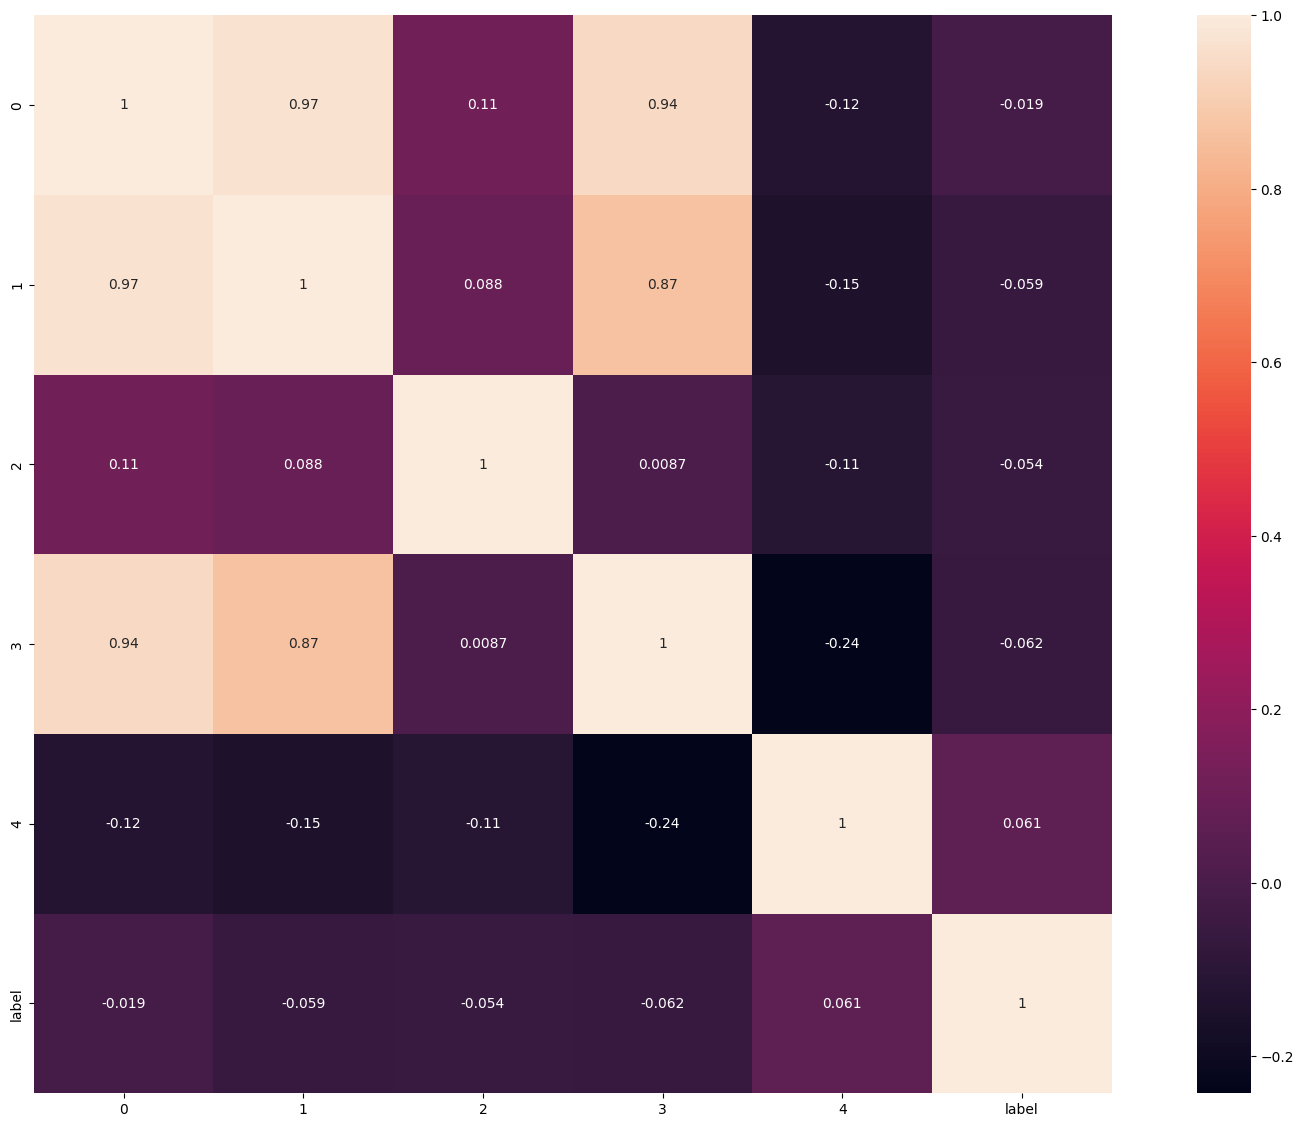

In [89]:
corrmat = df.corr()
print(corrmat.index)

# Visualizar o resultado
plt.figure(figsize=(22,14))
sns.heatmap(corrmat, square=True, annot=True, cbar=True)
plt.show()

In [12]:
path_input_fan_id_06 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_06")

In [13]:

from mtsa import files_train_test_split
X_train, X_test, y_train, y_test = files_train_test_split(path_input_fan_id_06)
#if(len(y_train) == 0): 
#    X_train, X_test, y_train, y_test = files_train_test_split(path_input_2)
y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [14]:
# 10Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mtsa import IForest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import librosa
import seaborn as sns

X = []

y = np.array(y_train)  # log(x+1)
print(y)

for filename in X_train:
    audio, sample_rate = librosa.load(filename)
    X.append(audio)

X = np.array(X)

print(f'X: \n{X}')

k=10
kf = KFold(n_splits=k, shuffle=True, random_state=1)
kf.get_n_splits(X)

model_iforest = IForest(n_estimators=100, contamination=0.1, max_samples=128, max_features=0.5)

result=[]
print('---'*20)
print('KFold\t|RMSE\t|Variance score\t|AUC\t|')
for i, (train_index, val_index) in enumerate(kf.split(X)):

    print(f'Começou Kfold[{i}]')

    X_train = X[train_index]
    X_val = X[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    # Treinamento do modelo de regressão linear
    model_iforest.fit(X_train, y_train)

    # Predição no conjunto de validação
    preditions_val = model_iforest.predict(X_val)
    print(f'preditions_val: {preditions_val}')

    # Avaliação dos resultados
    ### COMENZAR O CODIGO AQUI ### 
    rmse = mean_squared_error(y_val, preditions_val, squared=False)
    score = r2_score(y_val, preditions_val)
    auc = calculate_aucroc(model_iforest, X_val, y_val)
    score_samples = model_iforest.score_samples(X_val)
    print(f'score_samples:\n {score_samples}')
    ### TERMINA AQUI ###


    result.append([rmse,score,auc])  
    print( f'K({i}):\t|{rmse:0.3f}\t|{score:0.5f}\t|{auc:0.5f}\t|' )
print('---'*20)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.43826677 -0.45861805 -0.45554278 -0.44455472 -0.4632964  -0.43609096
 -0.46348759 -0.4541062  -0.43806268 -0.46533186 -0.45046941 -0.45733689
 -0.44585106 -0.43542044 -0.45281162 -0.46815179 -0.43892918 -0.44667214
 -0.44690203 -0.45619383 -0.43846381 -0.43241825 -0.45440049 -0.45875851
 -0.43085467 -0.45173155 -0.45697129 -0.46133759 -0.45885628 -0.44209868
 -0.45727906 -0.44485719 -0.45537247 -0.43964866 -0.44896349 -0.43830544
 -0.46190057 -0.51084601 -0.45265002 -0.45671913 -0.4284082  -0.44616845
 -0.43488243 -0.44211857 -0.44459766 -0.44746795 -0.48220365 -0.44507642
 -0.47448872 -0.42303685 -0.45352407 -0.43670501 -0.44791075 -0.47492659
 -0.45345791 -0.4565673  -0.45175566 -0.45174648 -0.46493915 -0.431039
 -0.4400076  -0.46489702 -0.45865491 -0.43811137 -0.46088008 -0.4621512 ]
K(0):	|0.550	|0.00000	|nan	|
Começou Kfold[1]
preditions_val: [-1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.46864897 -0.42441201 -0.46298885 -0.43747322 -0.44700375 -0.4787763
 -0.45247708 -0.4541905  -0.47080303 -0.45511113 -0.43381425 -0.44893447
 -0.46129277 -0.44040183 -0.43150854 -0.44699465 -0.44855447 -0.46772532
 -0.45768603 -0.4406945  -0.46183927 -0.44923861 -0.4661647  -0.43467455
 -0.44680086 -0.4462168  -0.44156938 -0.46673082 -0.44921312 -0.43773284
 -0.44658143 -0.42784436 -0.44333083 -0.43546638 -0.43956847 -0.44150376
 -0.46419305 -0.46555414 -0.45456013 -0.43672326 -0.44627506 -0.44477086
 -0.42681078 -0.42269812 -0.44101695 -0.45721533 -0.43918919 -0.4758495
 -0.47160408 -0.44764376 -0.43301734 -0.47581175 -0.45307045 -0.45925409
 -0.46087315 -0.44881624 -0.44250582 -0.43764342 -0.42809953 -0.44852872
 -0.45569517 -0.43344445 -0.45716666 -0.43671266 -0.44755792 -0.43560567]
K(1):	|0.816	|0.00000	|nan	|
Começou Kfold[2]
preditions_val: [ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.45232217 -0.43958793 -0.44024834 -0.45674508 -0.4371937  -0.45243773
 -0.45073976 -0.4406161  -0.45665891 -0.43371951 -0.44135549 -0.44828256
 -0.45508491 -0.47360364 -0.43261922 -0.45705726 -0.43815157 -0.44720898
 -0.44676664 -0.45254779 -0.43867053 -0.44993536 -0.46226307 -0.43222539
 -0.4534649  -0.47673228 -0.44779771 -0.46227468 -0.44973107 -0.44413067
 -0.46780939 -0.44083329 -0.4332829  -0.44729057 -0.45586382 -0.44060857
 -0.46560577 -0.44592746 -0.43682519 -0.45135411 -0.47314836 -0.46776612
 -0.47683807 -0.44511126 -0.45967865 -0.44741897 -0.4457587  -0.46216678
 -0.44899283 -0.45975368 -0.43650012 -0.45945067 -0.44219663 -0.45154182
 -0.45706293 -0.45321378 -0.45265732 -0.42780657 -0.45716763 -0.47145228
 -0.44928659 -0.46088539 -0.44512118 -0.44570153 -0.44627239 -0.44544054]
K(2):	|0.696	|0.00000	|nan	|
Começou Kfold[3]
preditions_val: [ 1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.45330818 -0.44235806 -0.45847654 -0.43507138 -0.44712913 -0.45371365
 -0.43981852 -0.44125727 -0.45960026 -0.44786102 -0.48666222 -0.44788481
 -0.44592666 -0.45815621 -0.47602622 -0.45753119 -0.44247414 -0.44180392
 -0.44374955 -0.44850238 -0.4499464  -0.42595794 -0.43517674 -0.44281003
 -0.45565121 -0.43715348 -0.44888586 -0.42376223 -0.44272815 -0.45236014
 -0.4614732  -0.44842648 -0.4407406  -0.44498449 -0.44870197 -0.44234798
 -0.43921092 -0.46834354 -0.46773058 -0.44380876 -0.43113483 -0.4474368
 -0.44679709 -0.45193576 -0.43929006 -0.44797269 -0.46828208 -0.44445402
 -0.42875006 -0.43859873 -0.45548841 -0.44176774 -0.46292277 -0.45570042
 -0.45166477 -0.4532226  -0.43650991 -0.44904521 -0.4478212  -0.45745973
 -0.45596247 -0.44535505 -0.44527113 -0.43421349 -0.4599785  -0.46246255]
K(3):	|0.550	|0.00000	|nan	|
Começou Kfold[4]
preditions_val: [ 1 -1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.45780865 -0.47051315 -0.47015358 -0.44542148 -0.44469157 -0.46727485
 -0.46074782 -0.43876117 -0.46250784 -0.43847939 -0.46229676 -0.46351278
 -0.44580839 -0.45648687 -0.44552304 -0.44190877 -0.44587112 -0.45430965
 -0.44352038 -0.45441357 -0.47262983 -0.4401976  -0.45928077 -0.47269861
 -0.42770576 -0.45864513 -0.45445823 -0.45331067 -0.46015973 -0.44760031
 -0.44791347 -0.4509227  -0.43594553 -0.44417476 -0.44210167 -0.46268253
 -0.44672847 -0.44169591 -0.46858871 -0.4381884  -0.45333526 -0.45917195
 -0.42883864 -0.43705837 -0.42646723 -0.44851729 -0.44897636 -0.43408832
 -0.46419024 -0.43891568 -0.44537957 -0.43470895 -0.4499578  -0.44549987
 -0.4543947  -0.44216292 -0.44162831 -0.45465974 -0.44889564 -0.46762798
 -0.45680203 -0.44105788 -0.46035204 -0.45650322 -0.45236011]
K(4):	|0.744	|0.00000	|nan	|
Começou Kfold[5]
preditions_val: [-1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.46435482 -0.44881    -0.44097876 -0.45623107 -0.46049046 -0.46557837
 -0.44765121 -0.44398235 -0.43622415 -0.455247   -0.43875283 -0.43373371
 -0.46719015 -0.44227461 -0.43831041 -0.43868237 -0.4483644  -0.45715466
 -0.44201318 -0.43747336 -0.43889456 -0.46407175 -0.43208061 -0.45337194
 -0.44118355 -0.47033254 -0.45563374 -0.47365434 -0.45031041 -0.4550963
 -0.43923688 -0.4654219  -0.43993636 -0.4581014  -0.45499564 -0.4407957
 -0.43284635 -0.43428153 -0.46816826 -0.44269503 -0.47008335 -0.44442829
 -0.4614888  -0.47291381 -0.44042223 -0.4529649  -0.46000804 -0.44040951
 -0.47051101 -0.47303834 -0.42934986 -0.46231722 -0.45649242 -0.45035505
 -0.45221368 -0.45854977 -0.4530444  -0.42788424 -0.45773162 -0.43194478
 -0.4599892  -0.43989041 -0.43403917 -0.45633953 -0.45697873]
K(5):	|0.859	|0.00000	|nan	|
Começou Kfold[6]
preditions_val: [ 1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.42259865 -0.43998206 -0.44598067 -0.44420104 -0.45914907 -0.46034784
 -0.45142661 -0.43713049 -0.4369669  -0.4557859  -0.42842504 -0.42631086
 -0.42146196 -0.44635744 -0.45748857 -0.43233399 -0.43241234 -0.43098215
 -0.44420118 -0.45398734 -0.42609637 -0.44763656 -0.42759085 -0.44595844
 -0.43205987 -0.44512742 -0.46707814 -0.43936137 -0.42998883 -0.43622192
 -0.45115562 -0.47209204 -0.45460994 -0.44640639 -0.45154511 -0.44430213
 -0.45503858 -0.44864309 -0.44163542 -0.44496889 -0.42366155 -0.44960561
 -0.46548351 -0.46041214 -0.46296922 -0.4460473  -0.43850628 -0.44471722
 -0.43024421 -0.4444992  -0.43589021 -0.47090255 -0.44761253 -0.44002328
 -0.47321083 -0.45381031 -0.43805735 -0.4430409  -0.46732741 -0.45612747
 -0.44361426 -0.44214615 -0.47423202 -0.4697277  -0.46072242]
K(6):	|0.894	|0.00000	|nan	|
Começou Kfold[7]
preditions_val: [ 1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.44704637 -0.45270249 -0.44909508 -0.45972332 -0.44923917 -0.44154683
 -0.44327984 -0.46357276 -0.44322178 -0.45182182 -0.46693427 -0.45582382
 -0.44401248 -0.43649927 -0.46357645 -0.43649323 -0.43548143 -0.44074084
 -0.45173869 -0.45492109 -0.46590741 -0.44551409 -0.43407813 -0.43465219
 -0.45441105 -0.44023391 -0.43998038 -0.45778474 -0.48595376 -0.44829574
 -0.46492662 -0.46229556 -0.44482658 -0.44719098 -0.43477363 -0.44915932
 -0.45496077 -0.44018658 -0.46392511 -0.46028226 -0.43462053 -0.43470172
 -0.46187096 -0.41703877 -0.45417009 -0.45246494 -0.45995489 -0.43641374
 -0.42528801 -0.45869857 -0.43136472 -0.43698819 -0.44595163 -0.44969956
 -0.43848321 -0.44647933 -0.41615796 -0.44781794 -0.44582608 -0.46847523
 -0.45087204 -0.46276018 -0.44613599 -0.45207598 -0.44759695]
K(7):	|0.608	|0.00000	|nan	|
Começou Kfold[8]
preditions_val: [-1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.45863438 -0.45310626 -0.42871927 -0.44513224 -0.43985643 -0.46928249
 -0.45206619 -0.45555439 -0.43578248 -0.45866792 -0.44869545 -0.44065264
 -0.44767929 -0.42926258 -0.43897988 -0.4580081  -0.43168688 -0.42697287
 -0.45168172 -0.44152386 -0.42237455 -0.4551694  -0.46131688 -0.43792534
 -0.43616035 -0.44972472 -0.43748748 -0.45287294 -0.43653561 -0.46613598
 -0.43907391 -0.45233093 -0.43912202 -0.43575643 -0.45620178 -0.45789263
 -0.46458407 -0.4469615  -0.44739622 -0.44632569 -0.45927528 -0.43430995
 -0.44521109 -0.4323953  -0.45384161 -0.4294139  -0.43288997 -0.47371422
 -0.43318664 -0.43004635 -0.4388248  -0.43036596 -0.43678855 -0.44759198
 -0.45216987 -0.4413716  -0.43635262 -0.45049682 -0.43896912 -0.44085194
 -0.43779072 -0.42490898 -0.42014254 -0.446907   -0.43372174]
K(8):	|0.702	|0.00000	|nan	|
Começou Kfold[9]
preditions_val: [ 1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1  1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


score_samples:
 [-0.45340741 -0.46178491 -0.46906366 -0.47986505 -0.44290299 -0.44614403
 -0.44883107 -0.44707186 -0.44766803 -0.4391499  -0.45579091 -0.45189128
 -0.43612329 -0.4531103  -0.44491218 -0.45414049 -0.47049365 -0.47298964
 -0.45121333 -0.42927261 -0.44711453 -0.44879208 -0.44320134 -0.44566489
 -0.44938635 -0.44519082 -0.45898116 -0.46301439 -0.45046994 -0.46161222
 -0.46127953 -0.46672038 -0.45432449 -0.44626783 -0.45193678 -0.44520724
 -0.4558936  -0.47742724 -0.48266003 -0.44718167 -0.44551476 -0.462976
 -0.4467305  -0.43642938 -0.46186039 -0.46097743 -0.43972139 -0.45717658
 -0.45264755 -0.45130841 -0.43735264 -0.46119696 -0.46139198 -0.45213714
 -0.44074884 -0.46209872 -0.44888745 -0.46477537 -0.45074694 -0.44902637
 -0.4455518  -0.4461085  -0.43054256 -0.45675307 -0.43734073]
K(9):	|0.702	|0.00000	|nan	|
------------------------------------------------------------


In [12]:
path_file_csv01 = '../experiments_result/100/n_estimator-100_contamination-0.1_max_samples-128_max_features-0.3.csv'
path_file_csv02 = '../experiments_result/100/n_estimator-100_contamination-0.1_max_samples-128_max_features-0.5.csv'
path_file_csv03 = '../experiments_result/100/n_estimator-100_contamination-0.1_max_samples-128_max_features-0.8.csv'
path_file_csv04 = '../experiments_result/100/n_estimator-100_contamination-0.1_max_samples-128_max_features-1.0.csv'
path_file_csv05 = '../experiments_result/100/n_estimator-100_contamination-0.1_max_samples-256_max_features-0.3.csv'
path_file_csv06 = '../experiments_result/100/n_estimator-100_contamination-0.1_max_samples-256_max_features-0.5.csv'
path_file_csv07 = '../experiments_result/100/n_estimator-100_contamination-0.1_max_samples-256_max_features-0.8.csv'
path_file_csv08 = '../experiments_result/100/n_estimator-100_contamination-0.1_max_samples-256_max_features-1.0.csv'
path_file_csv09 = '../experiments_result/100/n_estimator-100_contamination-0.172_max_samples-128_max_features-0.3.csv'
path_file_csv10 = '../experiments_result/100/n_estimator-100_contamination-0.172_max_samples-128_max_features-0.5.csv'
path_file_csv11 = '../experiments_result/100/n_estimator-100_contamination-0.172_max_samples-128_max_features-0.8.csv'
path_file_csv12 = '../experiments_result/100/n_estimator-100_contamination-0.172_max_samples-128_max_features-1.0.csv'
path_file_csv13 = '../experiments_result/100/n_estimator-100_contamination-0.172_max_samples-256_max_features-0.3.csv'
path_file_csv14 = '../experiments_result/100/n_estimator-100_contamination-0.172_max_samples-256_max_features-0.5.csv'
path_file_csv15 = '../experiments_result/100/n_estimator-100_contamination-0.172_max_samples-256_max_features-0.8.csv'
path_file_csv16 = '../experiments_result/100/n_estimator-100_contamination-0.172_max_samples-256_max_features-1.0.csv'
path_file_csv17 = '../experiments_result/200/n_estimator-200_contamination-0.1_max_samples-128_max_features-0.3.csv'
path_file_csv18 = '../experiments_result/200/n_estimator-200_contamination-0.1_max_samples-128_max_features-0.5.csv'
df_experiments_result_auc = pd.read_csv(path_file_csv01)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.294028
1,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.295056
2,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.293713
3,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.294012
4,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.293621
5,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.293813
6,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.294035
7,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.294097
8,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.293897
9,path_input_fan_id_06,100.0,128.0,0.1,0.3,0.294059


In [33]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29375, mean:0.29403, ci_upper:0.29431)




/tmp/ipykernel_29190/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


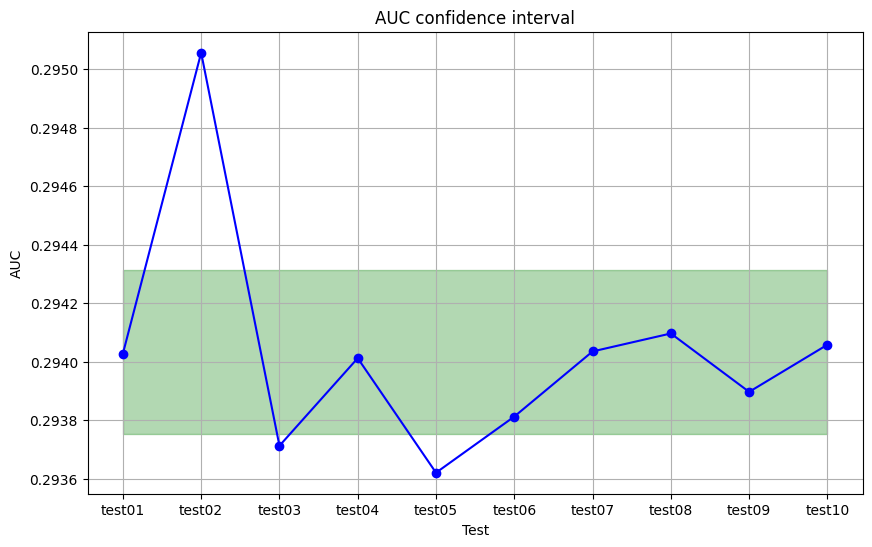

In [34]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [35]:
df_experiments_result_auc = pd.read_csv(path_file_csv02)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.296169
1,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.294235
2,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.295624
3,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.294051
4,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.293951
5,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.294296
6,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.293744
7,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.294135
8,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.294143
9,path_input_fan_id_06,100.0,128.0,0.1,0.5,0.293245


In [36]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29373, mean:0.29436, ci_upper:0.29498)




/tmp/ipykernel_29190/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


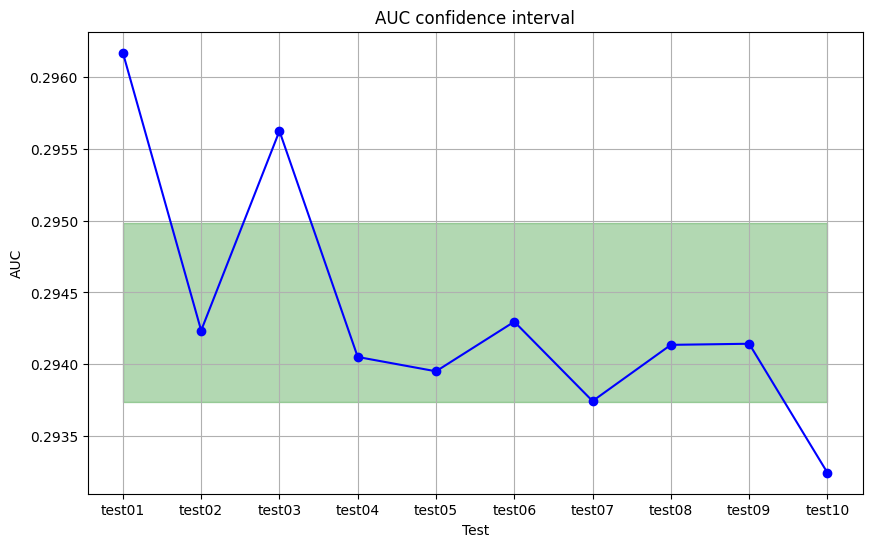

In [37]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [38]:
df_experiments_result_auc = pd.read_csv(path_file_csv03)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.294688
1,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.293161
2,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.294005
3,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.293683
4,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.293475
5,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.294066
6,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.294603
7,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.293851
8,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.294680
9,path_input_fan_id_06,100.0,128.0,0.1,0.8,0.295524


In [39]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29367, mean:0.29417, ci_upper:0.29468)




/tmp/ipykernel_29190/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


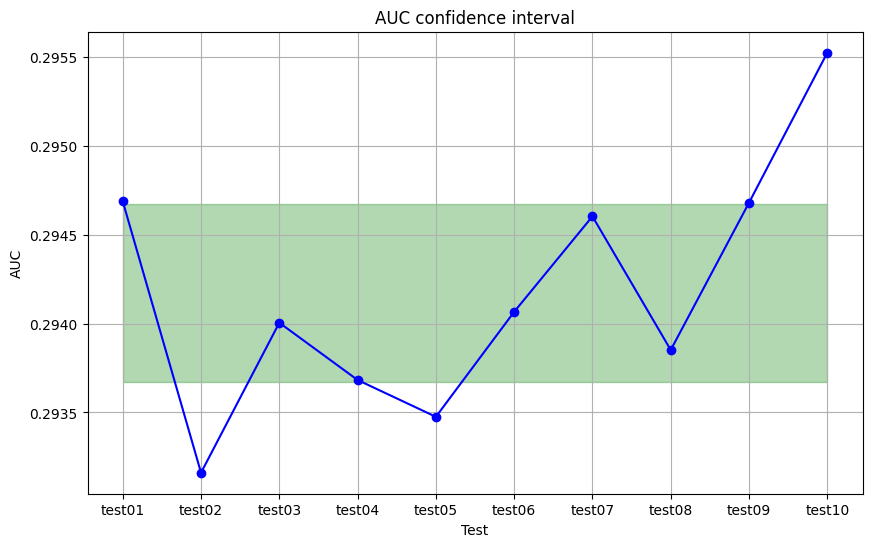

In [40]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [41]:
df_experiments_result_auc = pd.read_csv(path_file_csv04)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.294043
1,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.293721
2,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.293514
3,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.294012
4,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.293590
5,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.293115
6,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.293337
7,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.293759
8,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.293284
9,path_input_fan_id_06,100.0,128.0,0.1,1.0,0.293437


In [42]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29336, mean:0.29358, ci_upper:0.29380)




/tmp/ipykernel_29190/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


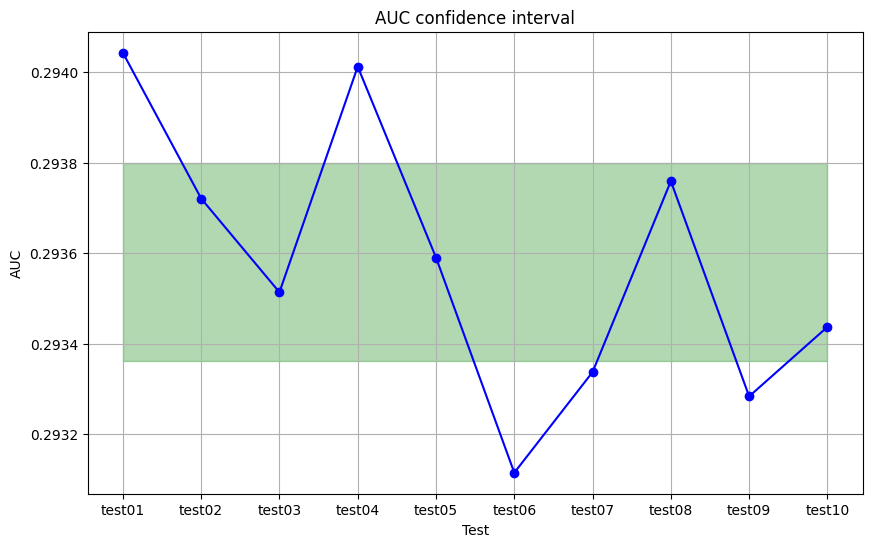

In [43]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [44]:
df_experiments_result_auc = pd.read_csv(path_file_csv05)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.293713
1,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.294105
2,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.293690
3,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.293828
4,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.294005
5,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.293736
6,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.294803
7,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.294074
8,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.293905
9,path_input_fan_id_06,100.0,256.0,0.1,0.3,0.293851


In [45]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29374, mean:0.29397, ci_upper:0.29420)




/tmp/ipykernel_29190/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


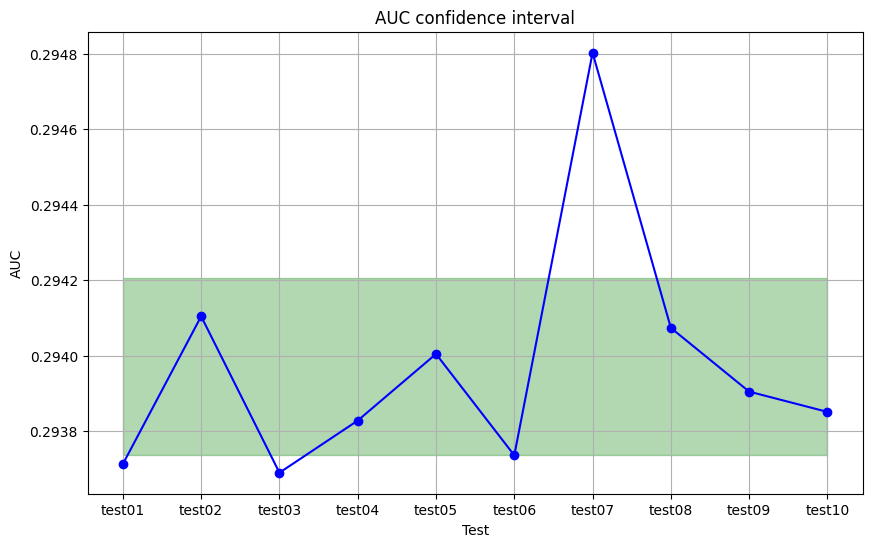

In [46]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [47]:
df_experiments_result_auc = pd.read_csv(path_file_csv06)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.294227
1,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.293844
2,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.293836
3,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.293644
4,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.293959
5,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.293821
6,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.294105
7,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.293698
8,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.293552
9,path_input_fan_id_06,100.0,256.0,0.1,0.5,0.294120


In [48]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29372, mean:0.29388, ci_upper:0.29404)




/tmp/ipykernel_29190/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


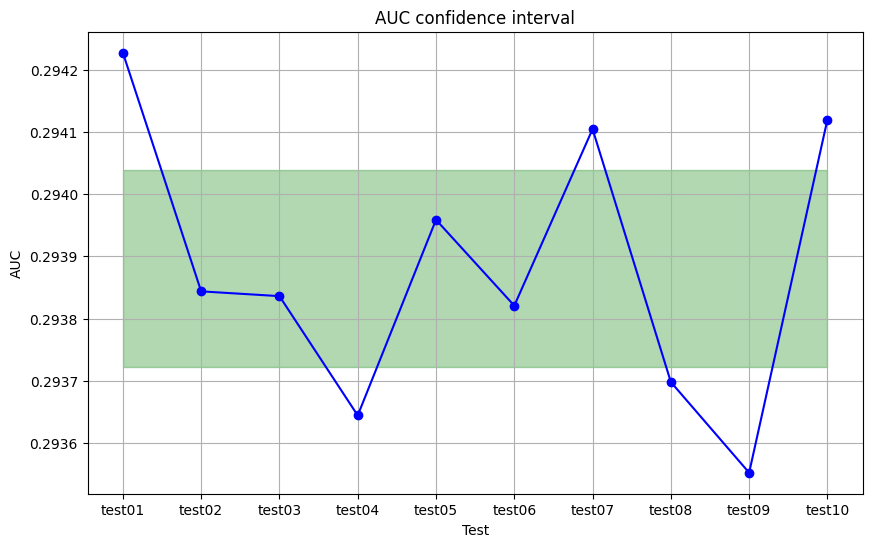

In [49]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [50]:
df_experiments_result_auc = pd.read_csv(path_file_csv07)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.293882
1,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.293966
2,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.294005
3,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.293667
4,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.294312
5,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.293606
6,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.293959
7,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.293913
8,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.293721
9,path_input_fan_id_06,100.0,256.0,0.1,0.8,0.294143


In [51]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29376, mean:0.29392, ci_upper:0.29407)




/tmp/ipykernel_29190/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


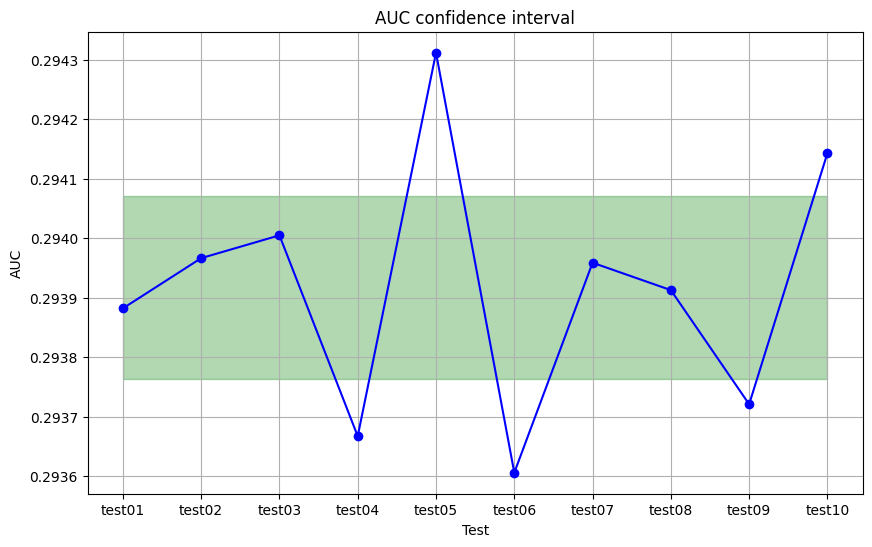

In [52]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [3]:
df_experiments_result_auc = pd.read_csv(path_file_csv08)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.294197
1,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.294649
2,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.293920
3,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.293445
4,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.293629
5,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.293782
6,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.294181
7,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.293798
8,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.294327
9,path_input_fan_id_06,100.0,256.0,0.1,1.0,0.293675


In [4]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29370, mean:0.29396, ci_upper:0.29422)




/tmp/ipykernel_34714/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


In [ ]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [5]:
df_experiments_result_auc = pd.read_csv(path_file_csv09)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.294419
1,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.294780
2,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.293836
3,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.293529
4,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.295685
5,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.293897
6,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.293613
7,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.293606
8,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.295647
9,path_input_fan_id_06,100.0,128.0,0.172,0.3,0.294028


In [6]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29372, mean:0.29430, ci_upper:0.29489)




/tmp/ipykernel_34714/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


In [ ]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [7]:
df_experiments_result_auc = pd.read_csv(path_file_csv10)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.293943
1,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.293790
2,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.294787
3,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.294105
4,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.294672
5,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.293253
6,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.293667
7,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.294281
8,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.294319
9,path_input_fan_id_06,100.0,128.0,0.172,0.5,0.294358


In [8]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29378, mean:0.29412, ci_upper:0.29445)




/tmp/ipykernel_34714/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


In [ ]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [9]:
df_experiments_result_auc = pd.read_csv(path_file_csv11)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.294066
1,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.293989
2,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.293406
3,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.293943
4,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.294350
5,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.293460
6,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.294404
7,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.295371
8,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.293307
9,path_input_fan_id_06,100.0,128.0,0.172,0.8,0.294250


In [10]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29362, mean:0.29405, ci_upper:0.29449)




/tmp/ipykernel_34714/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


In [ ]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [ ]:
df_experiments_result_auc = pd.read_csv(path_file_csv12)
df_experiments_result_auc

In [ ]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

In [ ]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [ ]:
df_experiments_result_auc = pd.read_csv(path_file_csv13)
df_experiments_result_auc

In [ ]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

In [ ]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [ ]:
df_experiments_result_auc = pd.read_csv(path_file_csv14)
df_experiments_result_auc

In [ ]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

In [ ]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [ ]:
df_experiments_result_auc = pd.read_csv(path_file_csv15)
df_experiments_result_auc

In [ ]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

In [ ]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [ ]:
df_experiments_result_auc = pd.read_csv(path_file_csv16)
df_experiments_result_auc

In [ ]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

In [ ]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [13]:
df_experiments_result_auc = pd.read_csv(path_file_csv17)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.293729
1,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.293636
2,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.293636
3,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.293621
4,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.293629
5,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.293629
6,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.293560
7,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.294035
8,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.293636
9,path_input_fan_id_06,200.0,128.0,0.1,0.3,0.293629


In [14]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29358, mean:0.29367, ci_upper:0.29377)




/tmp/ipykernel_34714/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


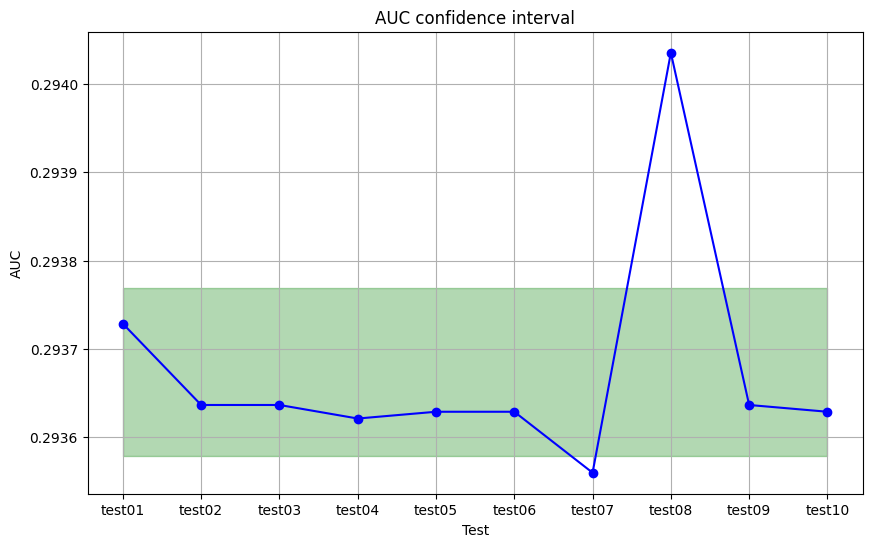

In [15]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()

In [16]:
df_experiments_result_auc = pd.read_csv(path_file_csv18)
df_experiments_result_auc

,actual_dataset,n_estimators,max_samples,contamination,max_features,AUC_ROC
0,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293636
1,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293721
2,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293652
3,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293636
4,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293629
5,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293629
6,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293606
7,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293667
8,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293644
9,path_input_fan_id_06,200.0,128.0,0.1,0.5,0.293821


In [17]:
ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))

print(f"Intervalo de confiança de 95% para a média: (ci_lower:{ci_lower:.5f}, mean:{np.mean(df_experiments_result_auc['AUC_ROC']):.5f}, ci_upper:{ci_upper:.5f})")
print()
print()

Intervalo de confiança de 95% para a média: (ci_lower:0.29362, mean:0.29366, ci_upper:0.29371)




/tmp/ipykernel_34714/2521709154.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_lower, ci_upper = st.t.interval(alpha=0.95, df=len(df_experiments_result_auc['AUC_ROC'])-1, loc=np.mean(df_experiments_result_auc['AUC_ROC']), scale=st.sem(df_experiments_result_auc['AUC_ROC']))


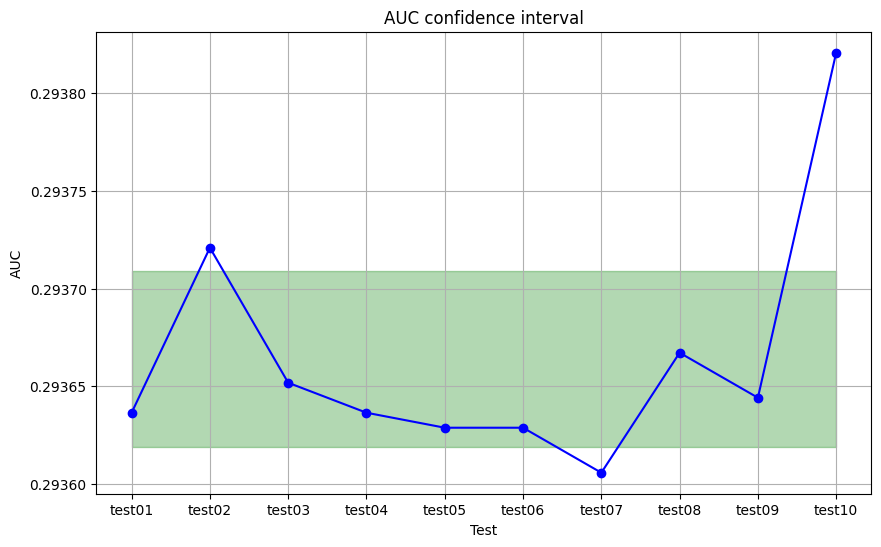

In [18]:
test_name = ['test01','test02','test03','test04','test05','test06','test07','test08','test09','test10']

plt.figure(figsize=(10, 6))
plt.plot(test_name, df_experiments_result_auc['AUC_ROC'], marker="o", color="b")
plt.fill_between(test_name, ci_lower, ci_upper, color="green", alpha=0.3)
plt.xlabel("Test")
plt.ylabel("AUC")
plt.title("AUC confidence interval")
plt.grid(True)
plt.show()